# Ланцюги Маркова та марковські процеси ухвалення рішень для розв'язання задачі навчання з підкріпленням.


Завдання (крок за кроком)

Для цієї задачі необхідно буде завантажити середовище FrozenLake-v1 з бібліотеки Open AI Gym.

Для виконання завдання необхідно виконати такі кроки:

1. Завантажити середовище за допомогою gym.make('FrozenLake-v1').

2. Використовуючи опис функції compute_value_function() в конспекті у розділі Ітерації за політиками запрограмувати її повний вигляд.

3. Використовуючи опис функції policy_iteration() в конспекті у розділі Ітерації за політиками запрограмувати її повний вигляд.

4. Візуалізувати отриману оптимальну політику за допомогою функції show_render() з конспекта.



In [60]:
# 1. Завантаження середовища за допомогою gym.make('FrozenLake-v1').

import gym
import matplotlib.pyplot as plt
import numpy as np

env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")
print(env.observation_space.n)
print(env.action_space.n)



def show_render(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()


16
4


In [65]:
# 2. Повний вигляд функції compute_value_function().

def compute_value_function(env, policy, gamma=0.9, theta=1e-6):
    # Ініціалізація значень для всіх станів
    value_function = np.zeros(env.observation_space.n)
    while True:
        delta = 0
        for state in range(env.observation_space.n):
            # Оцінка поточної політики
            action = policy[state]
            value = 0
            for prob, next_state, reward, done in env.P[state][action]:
                value += prob * (reward + gamma * value_function[next_state])
            delta = max(delta, abs(value - value_function[state]))
            value_function[state] = value
        if delta < theta:
            break
    print('value_function to return:', value_function)
    return value_function


In [66]:
# 3. Повний вигляд функції policy_iteration().

def policy_iteration(env, gamma=0.9):
    # Ініціалізація випадкової політики
    policy = np.random.choice(env.action_space.n, env.observation_space.n)
    while True:
        # Оцінка політики
        value_function = compute_value_function(env, policy, gamma)
        # Поліпшення політики
        policy_stable = True
        for state in range(env.observation_space.n):
            old_action = policy[state]
            action_values = np.zeros(env.action_space.n)
            for action in range(env.action_space.n):
                for prob, next_state, reward, done in env.P[state][action]:
                    action_values[action] += prob * (reward + gamma * value_function[next_state])
            new_action = np.argmax(action_values)
            policy[state] = new_action
            if old_action != new_action:
                policy_stable = False
        if policy_stable:
            break
    return policy


# # Завантажуємо середовище FrozenLake
# env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=True)

# # Запуск ітерації за політиками
# optimal_policy = policy_iteration(env)

# # Виведення оптимальної політики
# print("Оптимальна політика:")
# print(optimal_policy)

# # Візуалізація оптимальної політики

# # env.close()

In [67]:
def arrow_vizualization(policy, env):
    # Візуалізація політики
    action_symbols = ['←', '↓', '→', '↑']
    grid = np.array(policy).reshape((4, 4))
    for row in grid:
        print(' '.join([action_symbols[action] for action in row]))

value_function to return: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
value_function to return: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
value_function to return: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.  0.9 1.  0. ]
value_function to return: [0.   0.   0.   0.   0.   0.   0.81 0.   0.   0.81 0.9  0.   0.   0.9
 1.   0.  ]
value_function to return: [0.     0.     0.729  0.6561 0.     0.     0.81   0.     0.729  0.81
 0.9    0.     0.     0.9    1.     0.    ]
value_function to return: [0.     0.6561 0.729  0.6561 0.6561 0.     0.81   0.     0.729  0.81
 0.9    0.     0.     0.9    1.     0.    ]
value_function to return: [0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729
 0.81    0.9     0.      0.      0.9     1.      0.     ]
optimal_policy: [1 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]
↓ → ↓ ←
↓ ← ↓ ←
→ ↓ ↓ ←
← → → ←
State: 0, Step: 1, Action: 1 ...
... New state: 4, Reward: 0.0, Done: False, Info: {'prob': 1.0}


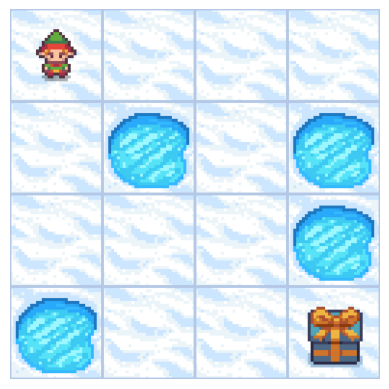

State: 4, Step: 2, Action: 1 ...
... New state: 8, Reward: 0.0, Done: False, Info: {'prob': 1.0}


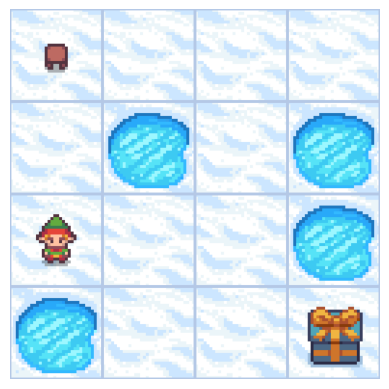

State: 8, Step: 3, Action: 2 ...
... New state: 9, Reward: 0.0, Done: False, Info: {'prob': 1.0}


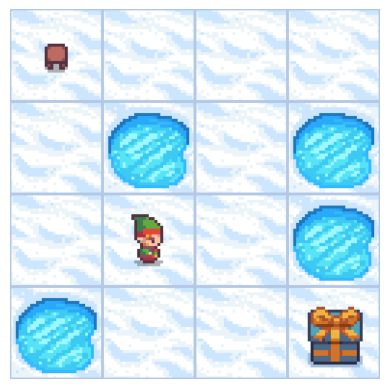

State: 9, Step: 4, Action: 1 ...
... New state: 13, Reward: 0.0, Done: False, Info: {'prob': 1.0}


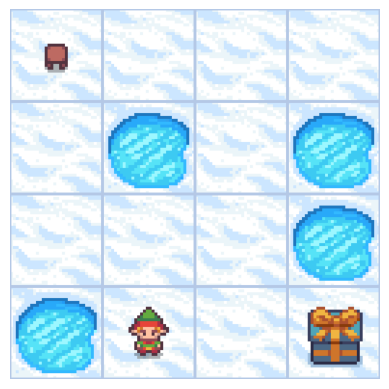

State: 13, Step: 5, Action: 2 ...
... New state: 14, Reward: 0.0, Done: False, Info: {'prob': 1.0}


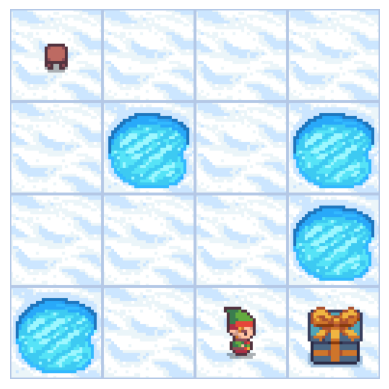

State: 14, Step: 6, Action: 2 ...
... New state: 15, Reward: 1.0, Done: True, Info: {'prob': 1.0, 'TimeLimit.truncated': False}


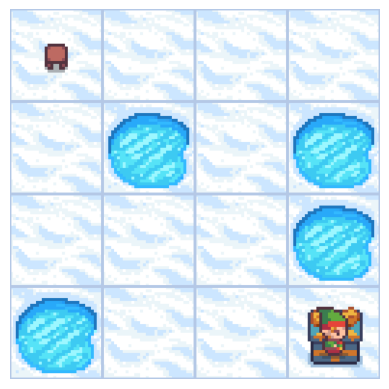

In [68]:

# Візуалізація отриманої оптимальнлї політики за допомогою функції show_render() з конспекта.

optimal_policy = policy_iteration(env)
print('optimal_policy:', optimal_policy)

arrow_vizualization(optimal_policy, env)


state = env.reset()  # Скидання середовища до початкового стану
done = False

step = 0  # Лічильник кроків

while not done:
    step += 1  # Збільшення лічильника кроків
    action = optimal_policy[state]  # Вибір дії згідно з політикою
    print(f'State: {state}, Step: {step}, Action: {action} ...')
    new_state, reward, done, info = env.step(action)  # Виконання дії
    print(f'... New state: {new_state}, Reward: {reward}, Done: {done}, Info: {info}')
    img = env.render()  # Отримання зображення середовища
    # print(env)
    # print(env.observation_space.n)
    # print(env.action_space.n)
    # print(img)
    show_render(img[0])  # Відображення зображення
    state = new_state  # Перехід до нового стану

env.close()  # Закриття середовища

# Висновки

1. ***При is_slippery=False (gamma=0.9):***

  Остання в ітерації value function добре відображає оцінку станів середовища.
   [0.59049 0.6561  0.729   0.6561  0.6561  0.      0.81    0.      0.729    0.81    0.9     0.      0.      0.9     1.      0.     ]
  * Значення функції цінності поступово збільшуються в напрямку цілі (виграшного стану), що означає, що політика ефективно спрямовує агента до цілі.
  * Нульові значення вказують на небезпечні "дірки", які агент намагається уникати.
  * Найбільше значення (1.0) свідчить про цільовий стан, де агент отримує максимальну винагороду.
  
  Система знаходить оптимальну політику, яка стабільно приводить до цільового стану за 6 кроків. Оптимальна політика:

  optimal_policy: [1 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]

  Це означає, що для кожного стану напрямок руху є чітко визначеним і зрозумілим:

        ↓ → ↓ ←
        ↓ ← ↓ ←
        → ↓ ↓ ←
        ← → → ←
  Таке вирішення демонструє впевнений і стабільний рух до цілі без будь-яких помилок або коливань. Це пояснюється тим, що в режимі is_slippery=False середовище передбачуване, і кожен крок виконується точно згідно з оптимальною політикою.

2. ***При is_slippery=True (gamma=0.25):***

  value_function [6.11867131e-06 2.23971313e-05 2.40599945e-04 2.40463981e-05
  4.60116001e-05 0.00000000e+00 2.62281589e-03 0.00000000e+00
  5.00858019e-04 5.46400483e-03 3.12332470e-02 0.00000000e+00
  0.00000000e+00 3.38341798e-02 3.66712194e-01 0.00000000e+00]

  Ці значення функції цінності є досить низькими, що свідчить про високу ймовірність підсковзування. Навіть близько до цілі (стани 14 і 10) значення функції цінності не досягають 1.0, що говорить про нестабільність шляху до цілі. Політика також має нерівномірну структуру дій (різні дії в схожих станах), що може призводити до випадкових або непослідовних кроків.

  optimal_policy: [1 3 2 3 0 0 0 0 3 1 0 0 0 2 1 0]


3. ***При is_slippery=True (gamma=0.95):***

  value_function [0.18046377 0.15475068 0.15347312 0.13254406 0.20896069 0. 0.17642887 0.         0.27045273 0.37464873 0.4036709  0.  0.         0.50897808 0.72367272 0.        ]

  У цьому випадку значення функції цінності значно вищі, особливо біля цілі (стан 14), що досягає 0.72. Це говорить про більш стабільний і передбачуваний шлях до цілі. Проте оптимальна політика залишається складною для інтерпретації, оскільки вибір дій не завжди є очевидним (наприклад, багато кроків у напрямку "вгору" або "вліво", де очікуваний шлях міг би бути іншим).

  optimal_policy: [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]

  Проте напрямок кроків важко зрозуміти, оскільки напрямки виглядають менш логічними:
        ← ↑ ← ↑
        ← ← ← ←
        ↑ ↓ ← ←
        ← → ↓ ←
  Через слизьку поверхню агент часто підковзується і змінює напрямок руху, що призводить до значних відхилень від оптимальної траєкторії. Навіть при наявності оптимальної політики, рух до цілі може займати різну кількість кроків, 15-20, у деяких випадках до 100 кроків. Буває, що агент кілька разів повертається на попередні позиції або навіть потрапляє в дірку, що призводить до програшу.

## Загальні висновки

* Стабільний результат навчання демонструється при is_slippery=False. У цьому випадку оптимальна політика чітко визначає шлях до цілі, що дозволяє агенту досягати її стабільно за 6 кроків без підсковзувань. Політика зрозуміла і легко відстежується:

* При зміні параметра is_slippery з False на True, середовище стає менш передбачуваним, і хоча оптимальна політика теоретично залишається незмінною, практична реалізація політики зазнає суттєвих змін через випадковість і підковзування.

* Низьке значення функції цінності при першій конфігурації (is_slippery=True та gamma=1.0) вказує на нестабільність та високу ймовірність підсковзування. Агент часто "блукає" по середовищу, роблячи випадкові або повторювані кроки.

* Вищі значення функції цінності при gamma=0.95 вказують на більшу стабільність і чіткіший шлях до цілі, але політика все ще залишається нелогічною з точки зору інтуїтивного розуміння.

* Поведінка агента при різних конфігураціях gamma демонструє, як вибір цього параметра впливає на оптимізацію шляху та на рівень ризику, який агент готовий прийняти.